In [ ]:
import pymysql
import pandas as pd
import numpy as np

In [2]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [3]:
sqlstr='SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000178N65") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE ' 

HDL=pd.DataFrame()
for i in range(0,30):
    limitstr='limit '+str(i*200000)+",200000"
    sqlstrfull=sqlstr+limitstr
    tagsub=pd.read_sql(sqlstrfull,con=conn)
    HDL=HDL.append(tagsub)

In [4]:
HDL

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,1.56,1.96,0.80,2020-02-29,73.0,M
1,055851700663,1.77,2.10,0.90,2020-01-09,60.0,M
2,057327593744,1.81,3.10,1.04,2020-01-09,50.0,MW
3,004953288248,0.95,2.59,1.04,2020-01-10,52.0,M
4,923475662478,1.97,2.00,0.78,2020-01-09,52.0,M
...,...,...,...,...,...,...,...
31552,5ki85hvje7pet02,1.40,2.00,0.90,2020-11-30,56.0,M
31553,5ki85hyhbuqrqmg,1.30,2.00,0.90,2020-11-30,51.0,MW
31554,5ki85ia9mfdlamb,1.28,2.00,0.90,2020-11-30,53.0,M
31555,5ki85ip7iysnhfq,1.44,1.45,0.90,2020-11-27,64.0,M


In [5]:
HDL.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\HDL\20201203.HDL_Recode.pkl")

In [213]:
HDL = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\HDL\20201203.HDL_Recode.pkl")

In [214]:
HDL_Recode1 = HDL.copy()

In [215]:
HDL_Recode1 = HDL_Recode1.dropna(subset = ['EXAM_DATE','EXAMINEE_AGE','RESULT',"EXAMINEE_GENDER"])

In [216]:
from datetime import datetime

In [217]:
HDL_Recode = HDL_Recode1.loc[(HDL_Recode1['EXAM_DATE']>datetime(2015,1,2,23,59)) & (HDL_Recode1['EXAM_DATE']<datetime(2021,12,1,0,0))]

In [28]:
HDL_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,1.56,1.96,0.80,2020-02-29,73.0,M
1,055851700663,1.77,2.10,0.90,2020-01-09,60.0,M
2,057327593744,1.81,3.10,1.04,2020-01-09,50.0,MW
3,004953288248,0.95,2.59,1.04,2020-01-10,52.0,M
4,923475662478,1.97,2.00,0.78,2020-01-09,52.0,M
...,...,...,...,...,...,...,...
31552,5ki85hvje7pet02,1.40,2.00,0.90,2020-11-30,56.0,M
31553,5ki85hyhbuqrqmg,1.30,2.00,0.90,2020-11-30,51.0,MW
31554,5ki85ia9mfdlamb,1.28,2.00,0.90,2020-11-30,53.0,M
31555,5ki85ip7iysnhfq,1.44,1.45,0.90,2020-11-27,64.0,M


#### 数据展现

In [15]:
HDL_Recode.RESULT.sort_values(ascending = False)

123438    51.57
62101      6.21
3631       6.05
101012     5.78
99321      5.72
          ...  
132374     0.25
164895     0.25
86946      0.18
172846     0.12
167099     0.02
Name: RESULT, Length: 230655, dtype: float64

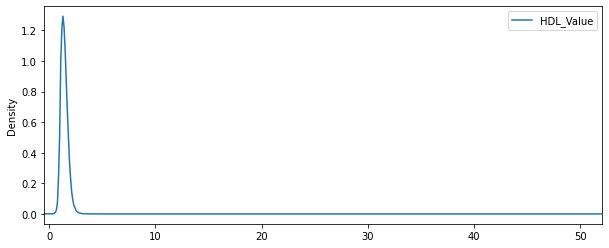

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
HDL_Recode.RESULT.dropna().plot(kind='kde', xlim=(min(HDL_Recode.RESULT)-0.5,max(HDL_Recode.RESULT)+0.5),label = "HDL_Value")
plt.legend()
plt.show()

In [37]:
HDL_Recode = HDL_Recode.sort_values(by=['RESULT'],ascending = False)
HDL_Recode = HDL_Recode.iloc[1:,:]

In [38]:
HDL_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
62101,643476252277,6.21,NaN,1.036,2019-01-19,29.0,M
3631,027735759598,6.05,NaN,1.036,2019-04-23,67.0,M
101012,854396633203,5.78,NaN,1.150,2018-09-20,29.0,MW
99321,371353981489,5.72,NaN,1.150,2018-09-26,22.0,UW
16213,5khzvbwljlq83ar,4.94,NaN,1.036,2019-04-23,65.0,MW
...,...,...,...,...,...,...,...
132374,148993365912,0.25,NaN,0.900,2020-08-09,27.0,UW
164895,5kgbtai93kj7hta,0.25,NaN,0.900,2020-10-09,42.0,M
86946,898161299113,0.18,NaN,0.900,2019-10-23,36.0,M
172846,5kgum4i54hx5sf6,0.12,1.549,1.040,2018-05-25,30.0,MW


<AxesSubplot:ylabel='Density'>

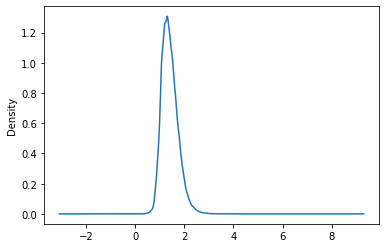

In [40]:
HDL_Recode.RESULT.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

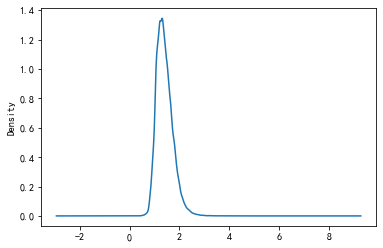

In [100]:
HDL_Select.RESULT.plot(kind='kde')

In [219]:
HDL_Recode['EXAM_DATE'] = pd.to_datetime(HDL_Recode['EXAM_DATE'])
HDL_Recode = HDL_Recode.set_index('EXAM_DATE')

In [158]:
HDL_Select = HDL_Recode.loc[~HDL_Recode.index.year.isin([2015,2020,2021]),:]

In [83]:
HDL_Select

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER,ValueRangeMean
EXAM_DATE,,,,,,,
2019-01-19 00:00:00,643476252277,6.21,NaN,1.036,29.0,M,NaN
2019-04-23 00:00:00,027735759598,6.05,NaN,1.036,67.0,M,NaN
2018-09-20 00:00:00,854396633203,5.78,NaN,1.150,29.0,MW,NaN
2018-09-26 00:00:00,371353981489,5.72,NaN,1.150,22.0,UW,NaN
2019-04-23 00:00:00,5khzvbwljlq83ar,4.94,NaN,1.036,65.0,MW,NaN
...,...,...,...,...,...,...,...
2019-11-16 00:00:00,805336863778,0.38,NaN,0.900,44.0,M,NaN
2019-09-24 00:00:00,923915035704,0.38,NaN,0.900,37.0,M,NaN
2017-06-17 09:00:00,5khkashacylfguc,0.37,1.680,0.910,63.0,MW,1.2950


In [63]:
HDL_SM = pd.DataFrame(HDL_Select.RESULT.resample("SM").agg([len,np.mean]))
HDL_M = pd.DataFrame(HDL_Select.RESULT.resample("M").agg([len,np.mean]))

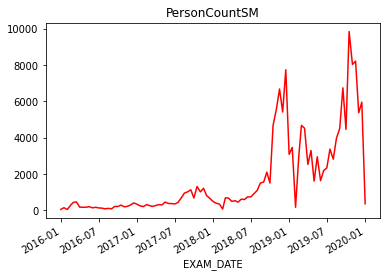

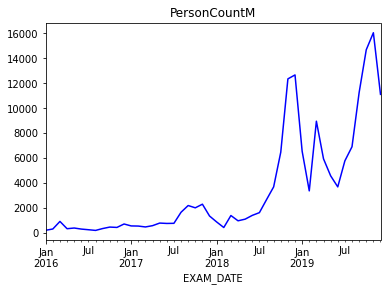

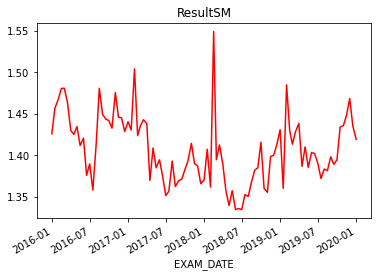

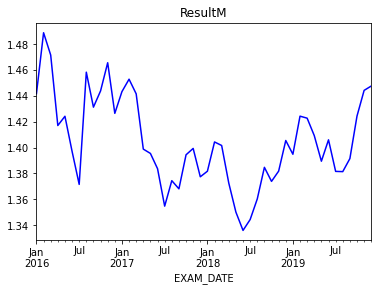

In [65]:
import matplotlib.pyplot as plt

data = [HDL_SM["len"],HDL_M["len"],HDL_SM["mean"],HDL_M["mean"]]
color = ["red","blue","red","blue"]
title = ["PersonCountSM","PersonCountM","ResultSM","ResultM"]

for i in range(0,4):
    data[i].dropna().plot(color = color[i])
    plt.title(title[i])
    plt.show()

In [ ]:
SBP_S_W = pd.DataFrame(SBP_Select.RESULT.resample("W").agg([len,np.mean]))
SBP_S_D = pd.DataFrame(SBP_Select.RESULT.resample("D").agg([len,np.mean]))

In [ ]:
import matplotlib.pyplot as plt

data = [SBP_S_W["len"],SBP_S_D["len"],SBP_S_W["mean"],SBP_S_D["mean"]]
color = ["red","blue","red","blue"]
title = ["PersonCountWeekly","PersonCountDaily","ResultWeekly","ResultDaily"]

for i in range(0,4):
    data[i].dropna().plot(color = color[i])
    plt.title(title[i])
    plt.show()

#### 上下限分布

<AxesSubplot:ylabel='Density'>

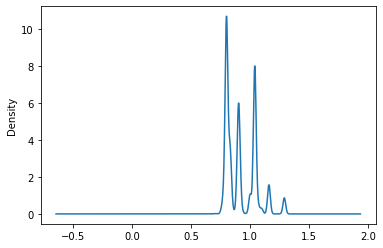

In [79]:
HDL_Select.LOWER_VALUE.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

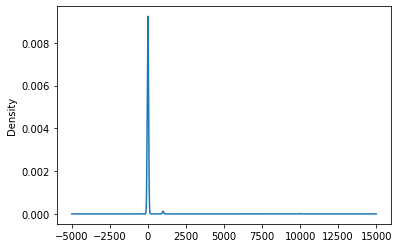

In [80]:
HDL_Select.UPPER_VALUE.plot(kind='kde')

In [81]:
Result_Range = HDL_Recode.groupby(['LOWER_VALUE'])['RESULT'].agg([np.mean,len]).dropna()

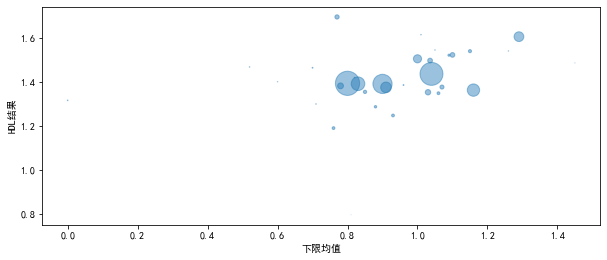

In [82]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10,4))
Range = Result_Range.index
result = Result_Range['mean'].values
size = Result_Range.len.values/100
plt.scatter(Range,result,s = size,alpha=0.45)
plt.xlabel('下限均值')  
plt.ylabel('HDL结果')
plt.show()

#### 年龄、性别对HDL的影响

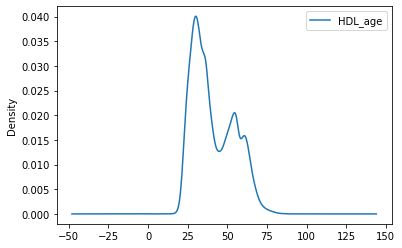

In [66]:
HDL_Select.EXAMINEE_AGE.plot(kind = "kde",label = "HDL_age")
plt.legend()
plt.show()

In [84]:
set(HDL_Select.EXAMINEE_GENDER)

{'M', 'MW', 'UW'}

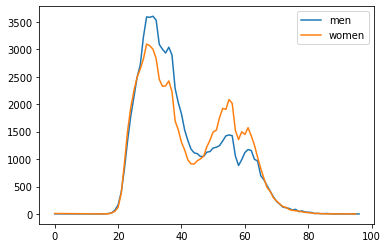

In [67]:
HDL_men = HDL_Select.loc[HDL_Select.EXAMINEE_GENDER == "M",:]
HDL_men_age = pd.DataFrame(HDL_men.groupby(['EXAMINEE_AGE'])['RESULT'].agg([len,np.mean]))

HDL_women = HDL_Select.loc[~HDL_Select.EXAMINEE_GENDER.isin(["M"]),:]
HDL_women_age = pd.DataFrame(HDL_women.groupby(['EXAMINEE_AGE'])['RESULT'].agg([len,np.mean]))

plt.plot(HDL_men_age.len,label = "men")
plt.plot(HDL_women_age.len,label = "women")
plt.legend()

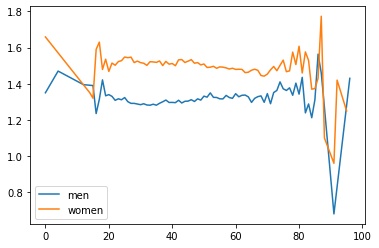

In [68]:
HDL_men = HDL_Select.loc[HDL_Select.EXAMINEE_GENDER == "M",:]
HDL_men_age = pd.DataFrame(HDL_men.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

HDL_women = HDL_Select.loc[~HDL_Select.EXAMINEE_GENDER.isin(["M"]),:]
HDL_women_age = pd.DataFrame(HDL_women.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

plt.plot(HDL_men_age,label = "men")
plt.plot(HDL_women_age,label = "women")
plt.legend()

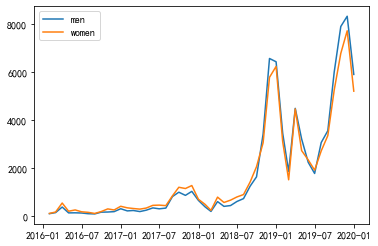

In [99]:
HDL_S_M = pd.DataFrame(HDL_men.RESULT.resample("M").agg([len,np.mean]))
HDL_S_W = pd.DataFrame(HDL_women.RESULT.resample("M").agg([len,np.mean]))

plt.plot(HDL_S_M.len,label = "men")
plt.plot(HDL_S_W.len,label = "women")
plt.legend()

In [98]:
HDL_men.ORDER_CODE.plot()

TypeError: no numeric data to plot

In [93]:
HDL_women_month = pd.DataFrame(HDL_women.groupby([HDL_Select.index.year,HDL_Select.index.month])['ORDER_CODE'].count())

ValueError: Grouper and axis must be same length

In [95]:
pd.DataFrame(HDL_women.groupby([HDL_Select.index.year,HDL_Select.index.month]))

ValueError: Grouper and axis must be same length

In [96]:
HDL_Select.index.year

Int64Index([2019, 2019, 2018, 2018, 2019, 2019, 2018, 2019, 2018, 2019,
            ...
            2019, 2019, 2019, 2019, 2017, 2019, 2019, 2017, 2019, 2018],
           dtype='int64', name='EXAM_DATE', length=162981)

In [97]:
HDL_Select.index.month

Int64Index([ 1,  4,  9,  9,  4,  5,  9,  4, 11,  4,
            ...
            11,  9, 10,  9,  5, 11,  9,  6, 10,  5],
           dtype='int64', name='EXAM_DATE', length=162981)

#### 截面分析

Text(0.5, 1.0, 'HDL & Age(Month)')

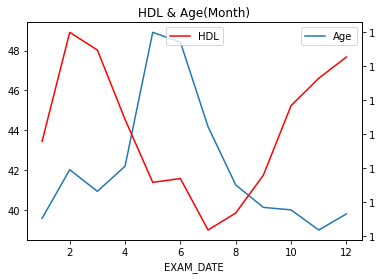

In [47]:
HDL_Month = pd.DataFrame(HDL_Select.groupby([HDL_Select.index.month])["RESULT"].mean())
HDL_Month_Age = pd.DataFrame(HDL_Select.groupby([HDL_Select.index.month])["EXAMINEE_AGE"].mean())

fig,ax=plt.subplots(1,1,figsize=(6,3))
ax1 = ax.twinx()


def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


HDL_Month.dropna().plot(ax=ax1,figsize=(6,3),style=['r-'])
ax1.legend(('HDL',),loc = 'upper center')

HDL_Month_Age.dropna().plot(ax=ax,figsize=(6,4)) 
ax.legend(('Age',))
plt.title("HDL & Age(Month)")

#### 按年龄标化

In [49]:
HDL_S_M = pd.DataFrame(HDL_Select.RESULT.resample('M').agg([len,np.mean]))

In [50]:
DateNodeList = HDL_S_M.index.tolist()
DateNodeList.insert(0,"2016-01-01")

In [51]:
AgeBins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
HDL_Select_age_cut = pd.DataFrame(pd.cut(HDL_Select["EXAMINEE_AGE"],bins = AgeBins,include_lowest = True))
HDL_Select_age_count = pd.DataFrame(HDL_Select_age_cut.groupby(['EXAMINEE_AGE'])['EXAMINEE_AGE'].count())
HDL_Select_age_count.columns = ["count"]
HDL_Select_age_count["percentage"] = (HDL_Select_age_count['count']/HDL_Select_age_count['count'].sum(axis = 0))

In [53]:
DateList = []
AdjustHDLList = []

#def Get_AdjustRate()
for i in range(1,len(DateNodeList)):
    T1 = pd.to_datetime(DateNodeList[i-1])
    T2 = pd.to_datetime(DateNodeList[i])    
    data = HDL_Select[(HDL_Select.index >=T1) & (HDL_Select.index <= T2)]
    data_age_cut = pd.DataFrame(pd.cut(data['EXAMINEE_AGE'],bins = AgeBins,include_lowest = True))
    data_age_cut["RESULT"] = data.RESULT
    Data = pd.DataFrame(data_age_cut.groupby(['EXAMINEE_AGE'])["RESULT"].mean())
    Data = Data.join(HDL_Select_age_count)
    Data["HDL"] = Data['RESULT']* Data['percentage']
    Data["HDL"] = Data["HDL"].fillna(method='bfill')    
    AdjustHDL = Data["HDL"].sum(axis = 0)
    Data["AdjustHDL"] = Data["HDL"].sum(axis = 0)
    Data["Date1"] = T1
    Data["Date1_"] =  Data["Date1"].dt.date
    Data["Date2"] = T2
    Data["Date2_"] = Data["Date2"].dt.date
#     Data['Date'] = Data.Date1_.dt.date.str.cat(Data.Date2_.dt.date,',',na_rep = "Missing")
#     DateList.append(set(Data["Date2"].dt.date))
    DateList.append(T2)
    AdjustHDLList.append(AdjustHDL)
AdjustHDL = pd.DataFrame({"Date":DateList,"Adjust_HDL":AdjustHDLList})
AdjustHDL = AdjustHDL.set_index("Date")

In [54]:
AdjustHDL = AdjustHDL.iloc[1:]

<AxesSubplot:xlabel='EXAM_DATE'>

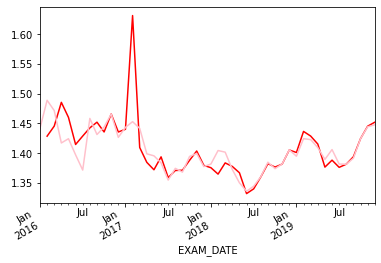

In [61]:
AdjustHDL['Adjust_HDL'].plot(color = 'red')
HDL_S_M["mean"].plot(color = "pink")
HDL_S_SM["mean"].plot(color = "b")

<AxesSubplot:xlabel='EXAM_DATE'>

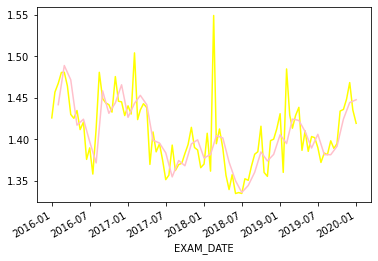

In [62]:
HDL_S_SM["mean"].plot(color = "yellow")
HDL_S_M["mean"].plot(color = "pink")

In [56]:
HDL_S_SM = pd.DataFrame(HDL_Select.RESULT.resample('SM').agg([len,np.mean]))

In [104]:
HDL_S_M = HDL_S_M.iloc[:,1]
HDL_S_M

EXAM_DATE
2016-01-31    1.422581
2016-02-29    1.410072
2016-03-31    1.355838
2016-04-30    1.296349
2016-05-31    1.315039
2016-06-30    1.304380
2016-07-31    1.225543
2016-08-31    1.349518
2016-09-30    1.320513
2016-10-31    1.305494
2016-11-30    1.351404
2016-12-31    1.318495
2017-01-31    1.320048
2017-02-28    1.337965
2017-03-31    1.355304
2017-04-30    1.311715
2017-05-31    1.300449
2017-06-30    1.290405
2017-07-31    1.263896
2017-08-31    1.258129
2017-09-30    1.255076
2017-10-31    1.279767
2017-11-30    1.262793
2017-12-31    1.265926
2018-01-31    1.275211
2018-02-28    1.283957
2018-03-31    1.307471
2018-04-30    1.270955
2018-05-31    1.240532
2018-06-30    1.258056
2018-07-31    1.240859
2018-08-31    1.266851
2018-09-30    1.275677
2018-10-31    1.273705
2018-11-30    1.282444
2018-12-31    1.305113
2019-01-31    1.286377
2019-02-28    1.338906
2019-03-31    1.325490
2019-04-30    1.307757
2019-05-31    1.288593
2019-06-30    1.310153
2019-07-31    1.294298
2

In [101]:
from scipy import stats
import statsmodels.api as sm  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
from statsmodels.tsa.stattools import adfuller

adfuller(HDL_S_M) 

(-4.079119337525422,
 0.0010484240484024921,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 -183.11566261987923)

<Figure size 432x288 with 0 Axes>

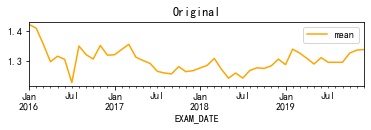

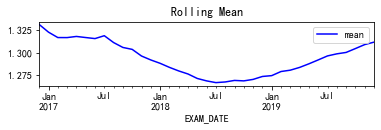

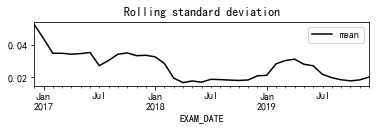

In [106]:
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeseries.rolling(window=size).mean()
    rol_std = timeseries.rolling(window=size).std()
    
    data = [timeseries,rol_mean,rol_std]
    colors = ["orange","blue","black"]
    title= ['Original','Rolling Mean','Rolling standard deviation']

    plt.figure()
    for i in range(0,3):
        ax = plt.subplot(3,1,i+1)
        data[i].dropna().plot(ax = ax, color = colors[i])
        plt.title(title[i])
        plt.legend()
        plt.show()

draw_trend(HDL_S_M,12)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


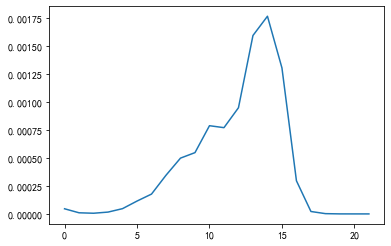

In [107]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

# p_value = acorr_ljungbox(AdjustSBP, lags=1) 
# print (p_value)

plt.plot(lb_test(HDL_S_M)[1])

In [112]:
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('M').mean()  
    data_test = test.resample('M').mean()
 
    return data_train,data_test

data_train,data_test = Resampling(HDL_S_M)

In [113]:
data_test

EXAM_DATE
2019-01-31    1.286377
2019-02-28    1.338906
2019-03-31    1.325490
2019-04-30    1.307757
2019-05-31    1.288593
2019-06-30    1.310153
2019-07-31    1.294298
2019-08-31    1.294503
2019-09-30    1.294459
2019-10-31    1.325472
2019-11-30    1.335576
2019-12-31    1.337739
Freq: M, Name: mean, dtype: float64

In [109]:
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA

from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot

import sklearn.metrics
import matplotlib.pyplot as plt
import itertools

In [115]:
p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 20
q_max = 20

for p,q in itertools.product(range(p_min,p_max+1),range(q_min,q_max+1)):

    arma_model = ARMA(data_train,(p,q))
    try:
        result = arma_model.fit(disp=-1, method='css')
    except:
        continue 
    pred = result.predict()
    pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                      dynamic=True)

    data_test_result = data_test.values
    pred_one_result = pred_one.values
 
    MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
    MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
    R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)

    MSEList.append(MSE)
    MAEList.append(MAE)
    R2List.append(R2)
    p_value.append(p)
    q_value.append(q)

       
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_max = df.loc[df.R2== df.R2.max(),:]

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\stat

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

ValueError: Insufficient degrees of freedom to estimate

In [117]:
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

In [119]:
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_max = df.loc[df.R2== df.R2.max(),:]

In [120]:
MSE_min

,p,q,MSE,MAE,R2
115,15,6,0.000189,0.011907,0.491372


In [121]:
MAE_min

,p,q,MSE,MAE,R2
115,15,6,0.000189,0.011907,0.491372


In [122]:
R2_max

,p,q,MSE,MAE,R2
115,15,6,0.000189,0.011907,0.491372


In [127]:
data_test

EXAM_DATE
2019-01-31    1.286377
2019-02-28    1.338906
2019-03-31    1.325490
2019-04-30    1.307757
2019-05-31    1.288593
2019-06-30    1.310153
2019-07-31    1.294298
2019-08-31    1.294503
2019-09-30    1.294459
2019-10-31    1.325472
2019-11-30    1.335576
2019-12-31    1.337739
Freq: M, Name: mean, dtype: float64

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<Figure size 720x288 with 0 Axes>

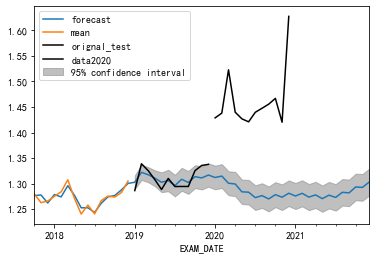

In [164]:
arma_model = ARMA(data_train,(15,6))
result = arma_model.fit(disp=-1, method='css')

plt.figure(figsize = (10,4))
fig = result.plot_predict(start= "2017-10-31",end =" 2021-12-30")
data_test.plot(color = "black",label = "orignal_test")
HDL_2020.plot(color = "black",label = "data2020")
plt.legend(loc =0)

In [159]:
HDL_Select1 = HDL_Recode.loc[HDL_Recode.index.year.isin([2020,2021]),:]
HDL_Select1

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAMINEE_AGE,EXAMINEE_GENDER
EXAM_DATE,,,,,,
2020-04-25 00:00:00,297364375705,4.00,1.800,0.77,59.0,MW
2020-11-26 00:00:00,5ki5le8kw7ta6a5,3.92,1.940,1.15,50.0,M
2020-10-12 16:05:49,5kh7dyjxexlir43,3.77,1.550,1.29,23.0,MW
2020-07-04 00:00:00,695538850516,3.73,NaN,1.04,56.0,MW
2020-10-20 00:00:00,5kgw1rfmnv2lv1f,3.66,NaN,1.04,37.0,MW
...,...,...,...,...,...,...
2020-08-23 00:00:00,5kgvooa3hoc1elj,0.32,1.549,1.04,55.0,M
2020-11-14 00:00:00,5khjwynirjrz30r,0.27,1.420,1.16,55.0,M
2020-08-09 00:00:00,148993365912,0.25,NaN,0.90,27.0,UW


In [160]:
HDL_S_M2020 = pd.DataFrame(HDL_Select1.RESULT.resample('M').agg([len,np.mean]))

In [161]:
HDL_S_M2020.sort_values(by = ['len'],ascending = False)

,len,mean
EXAM_DATE,,
2020-09-30,13500.0,1.455418
2020-10-31,12344.0,1.466760
2020-11-30,11742.0,1.420131
2020-08-31,8521.0,1.447426
2020-07-31,7122.0,1.439568
2020-06-30,4660.0,1.420914
2020-01-31,3957.0,1.428651
2020-05-31,3818.0,1.426742
2020-04-30,1342.0,1.439753


In [163]:
HDL_2020 = HDL_S_M2020.iloc[:,1]

#### 再次预测

In [220]:
HDL_Select2 = HDL_Recode.loc[~HDL_Recode.index.year.isin([2015,2020]),:]

In [261]:
r_HDL = pd.DataFrame(HDL_Select2.RESULT.resample('SM').agg([len,np.mean]))

In [262]:
r_HDL = r_HDL.iloc[:,1]

In [263]:
r_HDL = r_HDL.sort_values(ascending = False)
r_HDL = r_HDL.iloc[1:]

<AxesSubplot:xlabel='EXAM_DATE'>

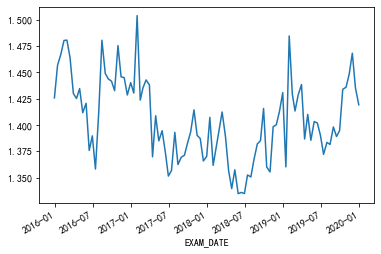

In [264]:
r_HDL.plot()

In [185]:
r_HDL.sort_values(ascending = False)

EXAM_DATE
2018-02-25    1.593600
2020-03-01    1.560000
2016-02-07    1.547143
2016-08-21    1.541897
2017-02-12    1.523490
                ...   
2018-07-08    1.317532
2016-06-26    1.315769
2020-02-09         NaN
2020-02-16         NaN
2020-03-08         NaN
Name: mean, Length: 256, dtype: float64

In [186]:
r_HDL1 = r_HDL.loc[~r_HDL.index.year.isin([2020]),:]
r_HDL2 = r_HDL.loc[r_HDL.index.year.isin([2020]),:]

IndexingError: Too many indexers

In [249]:
from statsmodels.tsa.stattools import adfuller

adfuller(r_HDL) 

(2.789186901280947,
 1.0,
 14,
 193,
 {'1%': -3.4646940755442612,
  '5%': -2.8766348847254934,
  '10%': -2.5748163958763994},
 -2195.814646129805)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


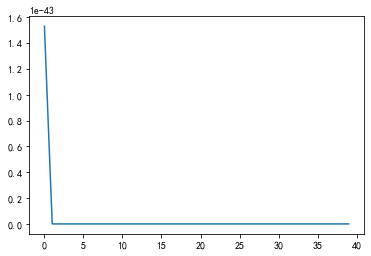

In [195]:
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

plt.plot(lb_test(r_HDL)[1])

<AxesSubplot:xlabel='EXAM_DATE'>

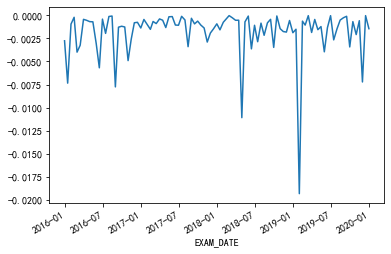

In [265]:
# 非平稳性处理：差分
diff1 = r_HDL.diff(1).dropna() 
diff1.plot()

In [226]:
diff1

EXAM_DATE
2016-02-07   -0.046457
2016-08-21   -0.005246
2017-02-12   -0.018407
2016-11-13   -0.000712
2019-02-10   -0.002778
                ...   
2018-06-24   -0.000897
2019-01-20   -0.001151
2018-06-17   -0.005291
2018-07-08   -0.001518
2016-06-26   -0.001762
Name: mean, Length: 207, dtype: float64

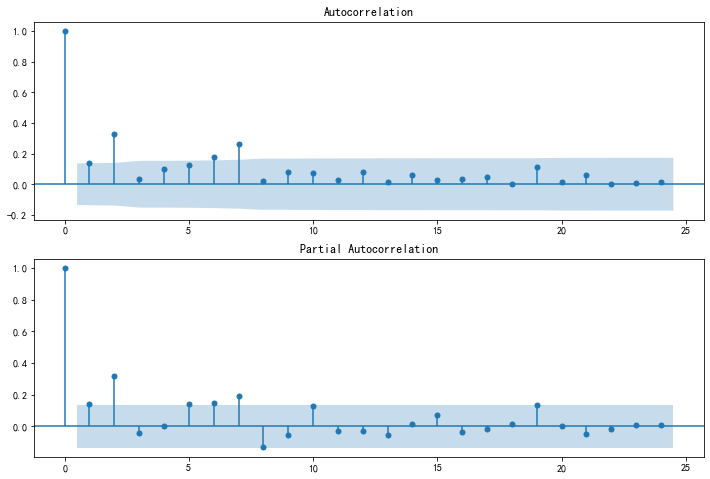

In [199]:
## 3.1 ACF和PACF定阶

fig = plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,ax=ax2)

In [225]:
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA

from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot

import sklearn.metrics
import matplotlib.pyplot as plt
import itertools

In [266]:
## 3.2 根据ARMA拟合效果定阶
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('SM').mean()  
    data_test = test.resample('SM').mean()
 
    return data_train,data_test

data_train,data_test = Resampling(diff1)

In [267]:
data_train = pd.DataFrame(data_train)

In [276]:
for i in diff1:
    print(i)

-0.019341354723706905
-0.003988242704178857
-7.236335642701874e-05
-0.00020865139949233225
-0.0049082770472794746
-0.00722398346775166
-0.0009448023711917664
-0.0032452849848918497
-0.007352450612843953
-0.007758826539313812
-0.0005764672325749842
-0.0025953884491156654
-0.0008013400229629486
-0.0012837526787843334
-0.0008900833698979316
-0.0011783293643534698
-0.0013686987958827501
-0.0018535170128504141
-0.00038521026404447767
-0.002083004922592613
-0.0006624442846883127
-2.7895608095018787e-05
-0.0006797040211914407
-0.000677570676941297
-0.001259229153961705
-0.0018841626949568369
-0.0004441477076062572
-0.00043124745161060574
-0.0006246382327501632
-0.0007532018633964466
-3.115590443680816e-05
-0.0027554227534305475
-0.0005368139223553836
-0.0015148492057406315
-0.003054472858637247
-0.0014451224540272811
-0.0034738526703499417
-0.0013684302134640003
-0.0010539710422372561
-0.00012038886775611601
-0.0005558364656443882
-0.00025463620275156806
-0.000699403874814708
-0.0015529595015

In [256]:
data_train_na = data_train.loc[data_train.isna(),:]
data_train_na

IndexingError: Too many indexers

In [277]:
p_value = []
d_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 20
q_max = 20
d_min = 0
d_max = 1

for p,d,q in itertools.product(range(p_min,p_max+1),range(d_min,d_max+1),range(q_min,q_max+1)):

    arima_model = ARIMA(data_train,(p,d,q))
    try:
        result = arima_model.fit(disp=-1, method='css')
    except:
        continue 
    pred = result.predict()
    pred_one = result.predict(start= "2019-01-06",end =" 2019-12-29", \
                      dynamic=True)

    data_test_result = data_test.values
    pred_one_result = pred_one.values
 
    MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
    MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
    R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)

    MSEList.append(MSE)
    MAEList.append(MAE)
    R2List.append(R2)
    p_value.append(p)
    q_value.append(q)
    d_value.append(d)

       
df = pd.DataFrame({'p':p_value,'d':d_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_max = df.loc[df.R2== df.R2.max(),:]

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:849: RuntimeWarning: invalid value encountered in log
  llf = -nobs / 2. * (log(2 * pi) + log(sigma2)) - ssr / (2 * sigma2)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:849: RuntimeWarning: invalid value encountered in cdouble_scalars
  llf = -nobs / 2. * (log(2 * pi) + log(sigma2)) - ssr / (2 * sigma2)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').